In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from enum import Enum
import numpy as np


# read file
df = pd.read_excel('survey-results.xlsx')

schemes = ['Singular Constant', 'Singular Varying', 'Wall Constant', 'Wall Varying', 'Wave Constant', 'Wave Varying']


# define constants
class Column(Enum):
    AGE = 'What is your age'
    FREQUENCY = 'How often do you cycle?'
    TACTOR_DIRECTION = 'If an approaching vehicle is far, which tactor would you expect to be activated?'
    OVERALL_PREFERENCE = 'Which encoding scheme did you prefer? (1 - most preferred, 6 - least preferred)'
    ALERT_LIKERT = 'Please give your response for each scheme for the following statement: "If I were cycling, this scheme would be useful in alerting me of an approaching vehicle from behind"'
    DISTINGUISH_LIKERT = 'Please give your response for each scheme for the following statement: "It was easy to distinguish between different cues (vibrations for different distances)"'
    DISTINGUISH_COMMENT = 'Do you have any further comments regarding the distinguishability of the schemes?'

TOTAL_RESPONDENTS = len(df)
titlesize = 18
axissize = 16
valuesize = 14
tablesize = 12
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']


# define methods
def create_table(data, colLabels, cellLoc='center', loc='right', colLoc='center', fontsize=12, scale=(0.5, 1.5)):
    cell_text = []
    
    # get percentage of total
    total = data.sum()
    percentage_values = (data / total) * 100
    
    # add values to table
    for index, value in data.items():
        perc = percentage_values.loc[index]
        cell_text.append([index, value, f'{perc:.2f}%'])
    cell_text.append(['', total, '100%'])
    
    # create and customise table
    table = plt.table(cellText=cell_text, colLabels=colLabels, cellLoc=cellLoc, loc=loc, colLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(fontsize)
    table.scale(*scale)
    
def create_bar_plot(data, x_label, y_label, title, grid=True, show_table=False, figsize=(10, 6), tablecols=None):
    fig, ax = plt.subplots(figsize=figsize)
    
    bars = data.plot(kind='bar', color=colors, zorder=2, ax=ax)
    plt.title(title, fontsize=titlesize)
    plt.xlabel(x_label, fontsize=axissize)
    plt.ylabel(y_label, fontsize=axissize)
    
    # adjust tick label size and rotation
    plt.tick_params(axis='both', which='major', labelsize=valuesize)
    plt.xticks(rotation=0)
    
    # add grid lines
    if grid:
        plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)
        
    # remove borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # add table
    if show_table:
        create_table(data=data, colLabels=tablecols, fontsize=tablesize)
        
def create_pie_chart(data, labels, title, explode=None, autopct='%1.1f%%', show_table=False, figsize=(10, 6), tablecols=None):
    fig, ax = plt.subplots(figsize=figsize)
        
    if explode is None:
        explode = [0] * len(data)
        
    plt.pie(data, labels=labels, colors=colors, explode=explode, autopct=autopct, startangle=90, counterclock=False, textprops={'fontsize': valuesize})
    plt.title(title, fontsize=16)
    
    # add table
    if show_table:
        create_table(data=data, colLabels=tablecols, fontsize=tablesize, scale=(1, 2))


# Demographic

## Age

16-24           10
Not Answered     0
dtype: int64


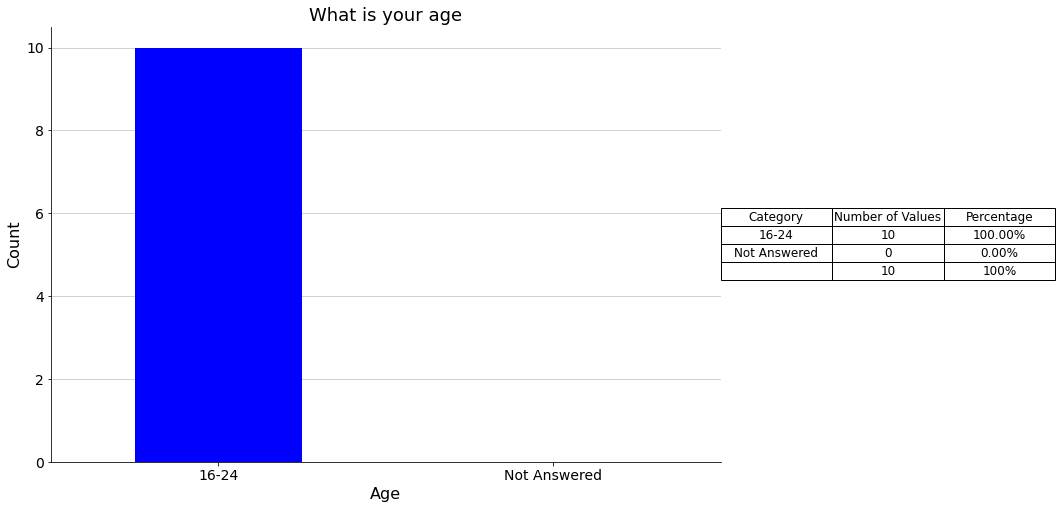

In [7]:
ages_count = df[Column.AGE.value].value_counts().sort_index(ascending=True)
not_answered_df = pd.Series([TOTAL_RESPONDENTS - ages_count.sum()], index=['Not Answered'])
ages_count = pd.concat([ages_count, not_answered_df])

print(ages_count)
create_bar_plot(data=ages_count, x_label='Age', y_label='Count', title=Column.AGE.value, 
                show_table=True, figsize=(12,8), tablecols=['Category', 'Number of Values', 'Percentage'])

## Cycle Frequency

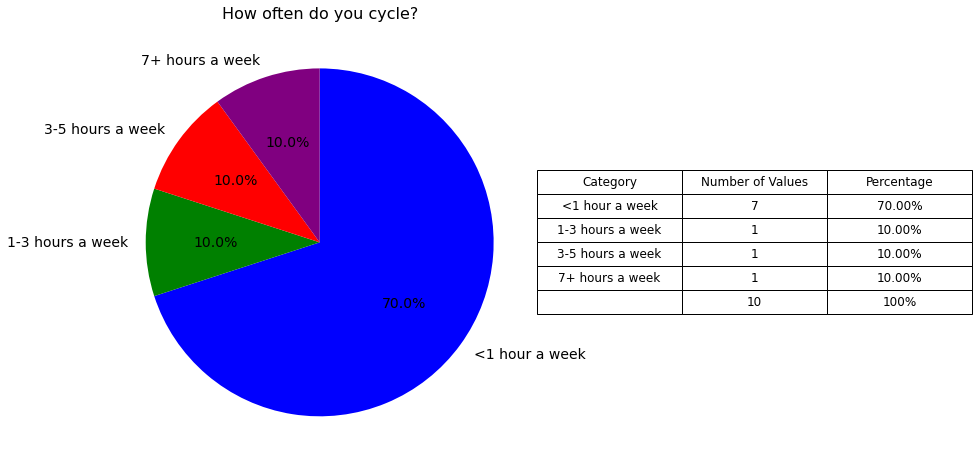

In [8]:
frequency_count = df[Column.FREQUENCY.value].value_counts()
create_pie_chart(data=frequency_count, labels=frequency_count.index, title=Column.FREQUENCY.value,
                show_table=True, figsize=(12,8), tablecols=['Category', 'Number of Values', 'Percentage'])

plt.show()

# Initial Thoughts on Tactors

## Tactor Spacing, Location, and Perception

## Understanding of Tactor Activation Direction

In [9]:
tactor_direction_count = df[Column.TACTOR_DIRECTION.value].value_counts().sort_index(ascending=True)
not_answered_df = pd.Series([TOTAL_RESPONDENTS - tactor_direction_count.sum()], index=['Not Answered'])
tactor_direction_count = pd.concat([tactor_direction_count, not_answered_df])

create_pie_chart(data=tactor_direction_count, x_label='Age', y_label='Count', title=Column.TACTOR_DIRECTION.value, 
                show_table=True, figsize=(12,8), tablecols=['Category', 'Number of Values', 'Percentage'])

TypeError: create_pie_chart() got an unexpected keyword argument 'x_label'

## Understanding of Following Distance

# Encoding Schemes

In [10]:
def create_pie_charts(graphs):
    for que, value in graphs.items():
        question = Column[que].value
        for scheme in schemes:
            count = df[scheme+value].value_counts().reindex(
                index=['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree']).fillna(0)
            create_pie_chart(data=count, labels=count.index, title=scheme,
                    show_table=True, figsize=(10,8), tablecols=['Category', 'Number of Values', 'Percentage'])
     


likert_questions = {
    "ALERT_LIKERT": '',
    "DISTINGUISH_LIKERT": '2',
}


<br><br>

# Results

In [15]:
df_results = pd.read_excel('participant-results.xlsx', sheet_name="Results")
df_trials = pd.read_excel('participant-results.xlsx', sheet_name='Trials')

guess_columns = ['Guess 1', 'Guess 2', 'Guess 3', 'Guess 4', 'Guess 5', 'Guess 6', 'Guess 7', 'Guess 8', 'Guess 9', 'Guess 10', 'Guess 11', 'Guess 12']

C:\Users\lewis\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


## Participant Results

There are 18 trials in total.

Trials 1, 4, 7, 10, 13, and 16 are training trials. These trials have 7 vibrations each, totalling 42 vibrations.

Trials 2, 3, 5, 6, 8, 9, 11, 12, 14, 15, 17, 18 are data collection trials. These trials have 12 vibrations each, totalling 144 vibrations.

Therefore the total number of vibrations across all 18 trials is 186.

In [16]:
df_results['Participant ID'] = df_results['Participant ID'].ffill()
participants_dict = {pid: group for pid, group in df_results.groupby('Participant ID')}
participant_totals = {}

data_trials = [2, 3, 5, 6, 8, 9, 11, 12, 14, 15, 17, 18]

# for each participants
for part_id, part_df in participants_dict.items():
    trial_totals = []
    participant_totals[part_id] = {}
    participant_totals[part_id]["trials"] = []
    participant_totals[part_id]["schemes"] = []
    participant_totals[part_id]["aggs"] = {}
    participant_totals[part_id]["distance_mistakes"] =  {"FAR": [], "NEAR": [], "IMMINENT": []}

    # for each trial
    for _, trial_row in part_df.iterrows():
        trial_number = trial_row['Trial']  # get the trial no.
        scheme = trial_row['Scheme'] # get the scheme
        trial_data = {
            "trial_id": trial_number,
            "scheme": scheme,
            "guesses": []
        }
        
        if pd.notna(trial_number): # if trial row not blank
            total_trial_correct = 0
            # add scheme
            if pd.notna(scheme) and scheme not in participant_totals[part_id]["schemes"]:
                participant_totals[part_id]["schemes"].append(scheme)
            
            # for each guess
            for guess_col in guess_columns:
                if guess_col in trial_row and guess_col in df_trials.columns:
                    # get participant guess
                    participant_guess = trial_row[guess_col]
                    trial_data["guesses"].append(participant_guess)
                    # check if answer is correct
                    correct_answer = df_trials.loc[trial_number - 1, guess_col]
                    if pd.notna(participant_guess):
                        if participant_guess == correct_answer:
                            total_trial_correct += 1 
                        else:
                            if trial_number in data_trials:
                                participant_totals[part_id]["distance_mistakes"][correct_answer].append([scheme, participant_guess])
            trial_totals.append(total_trial_correct)
            
        participant_totals[part_id]["trials"].append(trial_data)
        
    participant_totals[part_id]["aggs"]["trial_totals"] = trial_totals
    participant_totals[part_id]["aggs"]["training_trial_totals"] = [trial_totals[i] for i in [0, 3, 6, 9, 12, 15]]
    participant_totals[part_id]["aggs"]["data_trial_totals"] = [trial_totals[i] for i in [1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17]]
    participant_totals[part_id]["aggs"]["total"] = sum(trial_totals)
    participant_totals[part_id]["aggs"]["training_total"] = sum(participant_totals[part_id]["aggs"]["training_trial_totals"])
    participant_totals[part_id]["aggs"]["data_total"] = sum(participant_totals[part_id]["aggs"]["data_trial_totals"])
    

### participant results by data trial

The mean for each trial for each participant was [11.5, 10.916666666666666, 10.333333333333334, 11.583333333333334, 11.25, 11.0, 9.583333333333334, 11.25, 10.25, 10.083333333333334, 11.75, 11.5]
Giving a total mean of 10.916666666666666


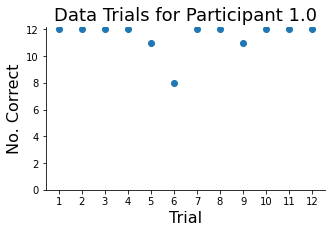

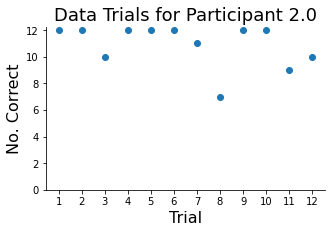

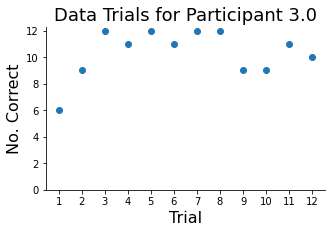

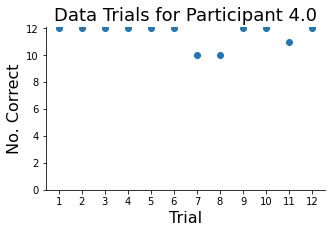

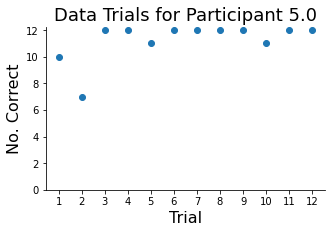

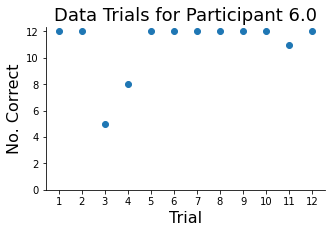

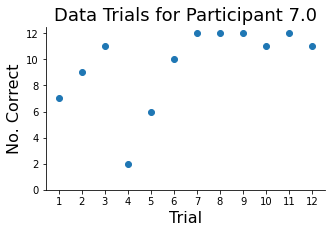

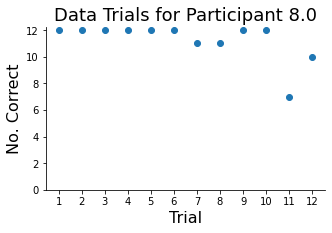

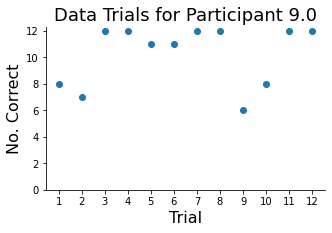

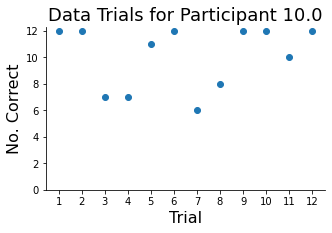

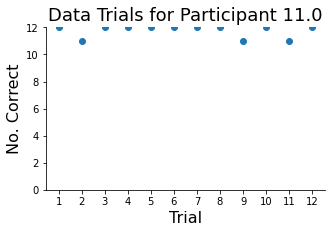

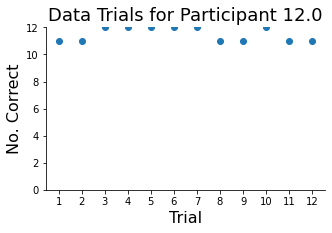

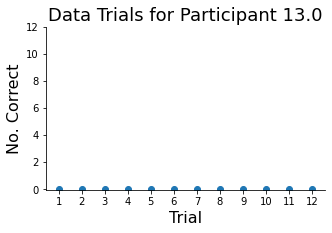

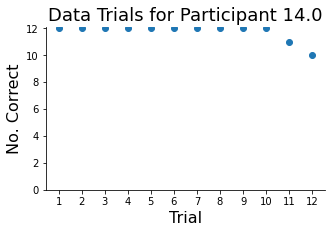

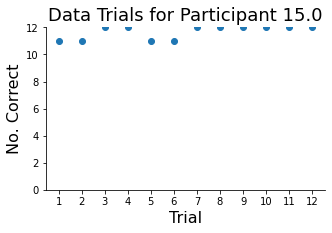

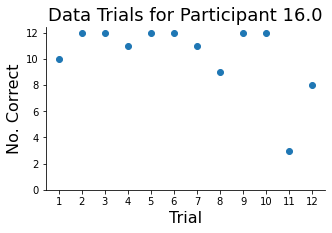

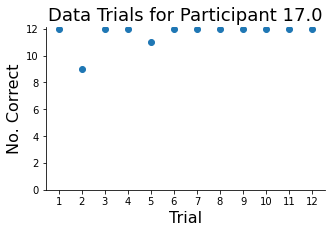

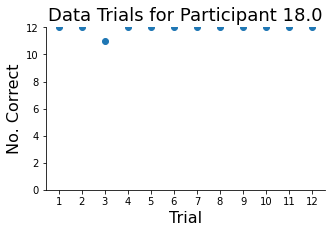

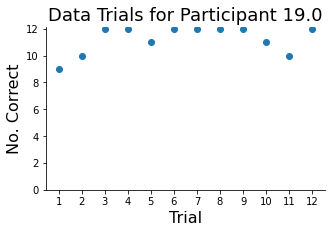

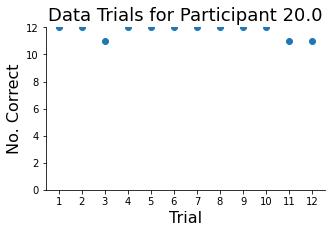

In [17]:
means = []

for p, results in participant_totals.items():
    totals = results["aggs"]["data_trial_totals"]
    means.append(np.mean(totals))
    
    fig, ax = plt.subplots(figsize=(5, 3))
    plt.scatter([i for i in range(1, len(totals)+1)], totals)
    
    plt.title(f"Data Trials for Participant {p}", fontsize=titlesize)
    plt.xlabel("Trial", fontsize=axissize)
    plt.ylabel("No. Correct", fontsize=axissize)
    
    plt.xticks(ticks=[i for i in range(1, len(totals)+1)])
    plt.yticks(ticks=[0, 2, 4, 6, 8, 10, 12])
    #plt.tick_params(axis='both', which='major', labelsize=valuesize)
        
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

print(f"The mean for each trial for each participant was {means[:12]}")
print(f"Giving a total mean of {np.mean(means[:12])}")


### participant results by scheme

The mean for each scheme for each participant was [23.0, 21.833333333333332, 20.666666666666668, 23.166666666666668, 22.5, 22.0, 19.166666666666668, 22.5, 20.5, 20.166666666666668, 23.5, 23.0]
Giving a total mean of 21.833333333333332


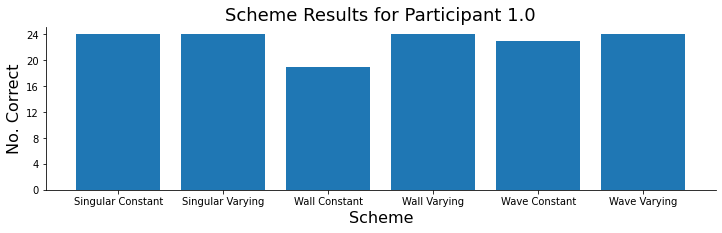

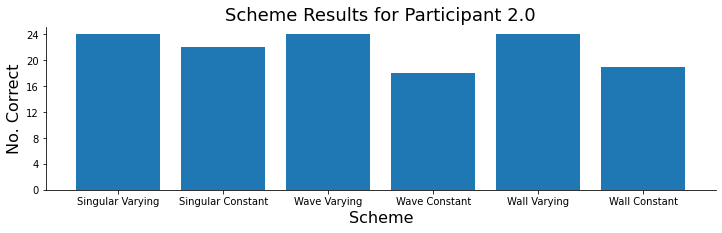

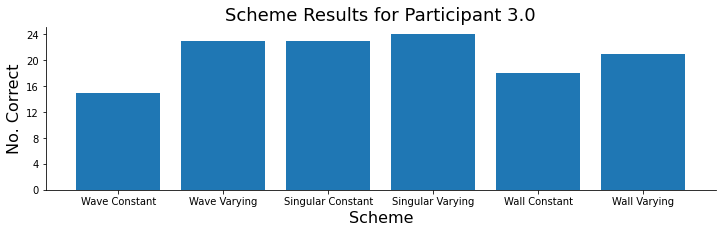

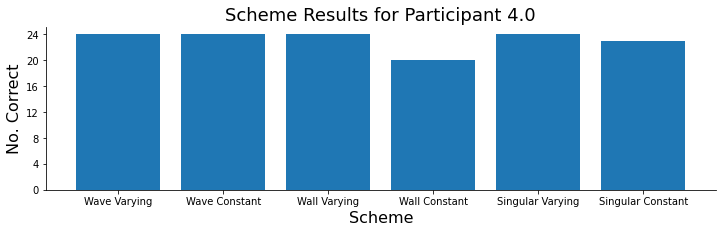

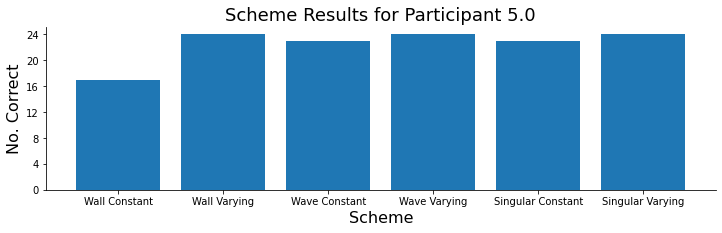

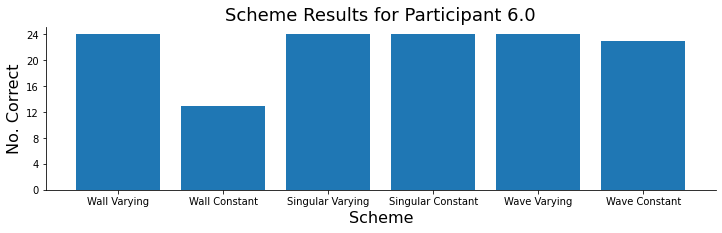

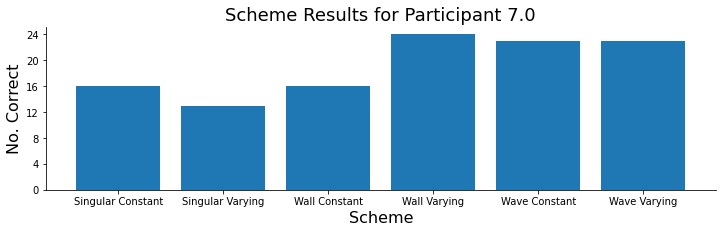

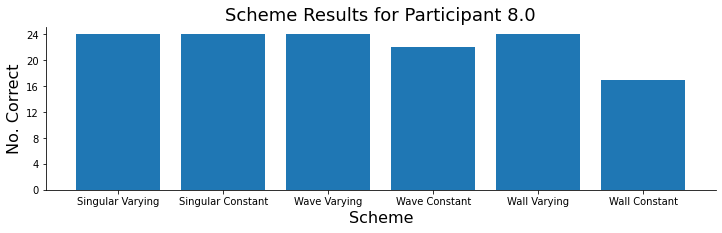

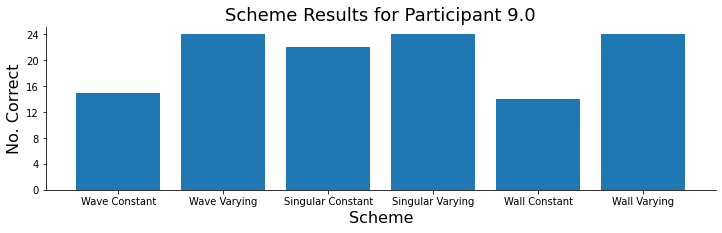

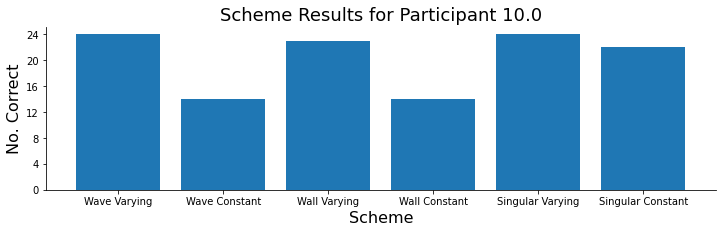

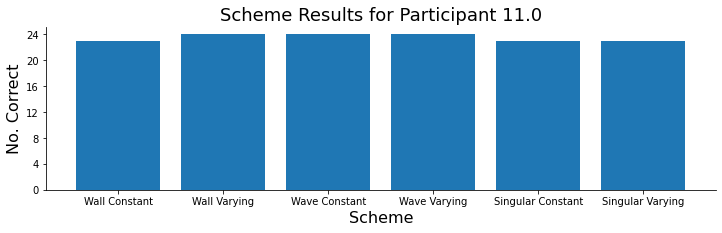

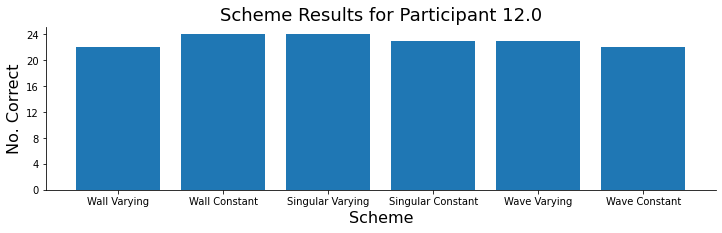

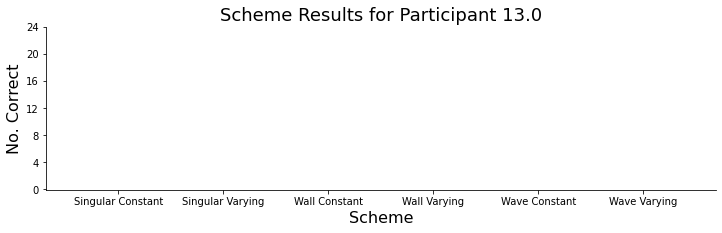

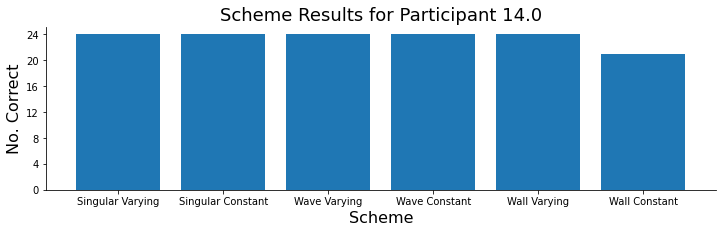

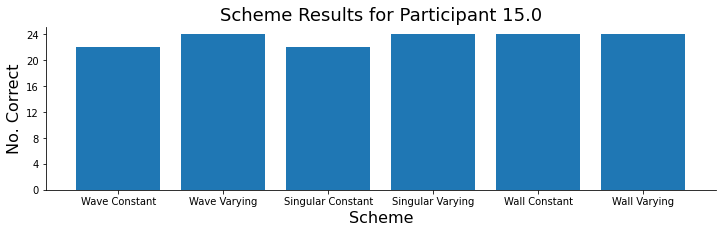

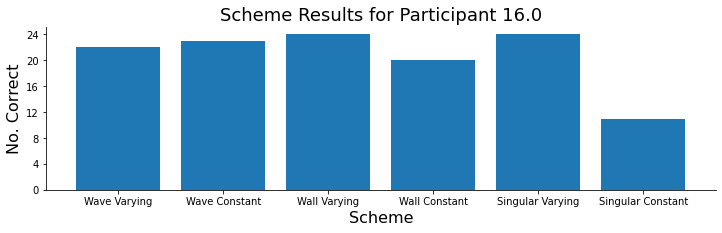

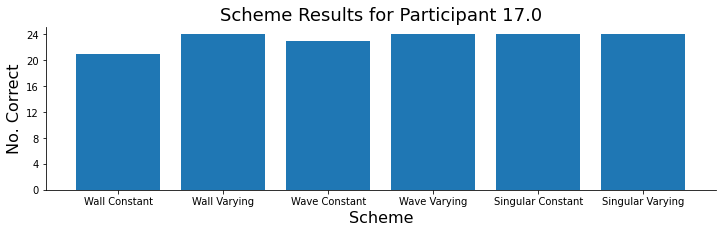

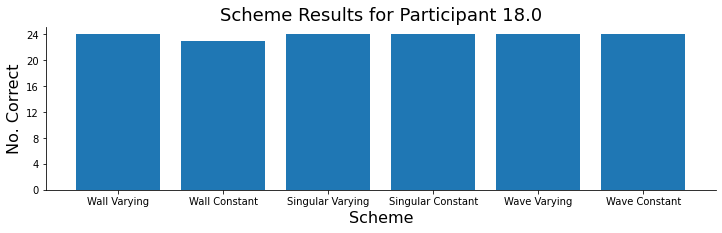

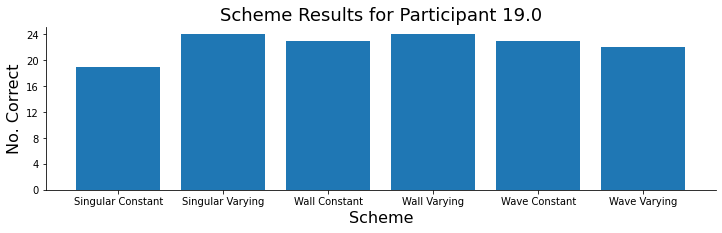

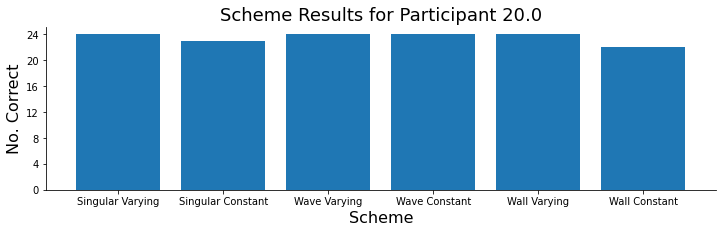

In [18]:
means = []

for p, results in participant_totals.items():
    t = results["aggs"]["data_trial_totals"]
    totals = [t[i] + t[i+1] for i in range(0, len(t), 2)]
    means.append(np.mean(totals))
    schemes = results["schemes"]
    
    fig, ax = plt.subplots(figsize=(12, 3))
    plt.bar(schemes, totals)
    
    plt.title(f"Scheme Results for Participant {p}", fontsize=titlesize)
    plt.xlabel("Scheme", fontsize=axissize)
    plt.ylabel("No. Correct", fontsize=axissize)
    
    plt.yticks(ticks=[i for i in range(0, 25, 4)])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
print(f"The mean for each scheme for each participant was {means[:12]}")
print(f"Giving a total mean of {np.mean(means[:12])}")

### Data Totals for every participant

[138, 131, 124, 139, 135, 132, 115, 135, 123, 121, 141, 138, 0, 141, 140, 124, 140, 143, 135, 141]
[138 131 124 139 135 132 115 135 123 121 141 138 141 140 124 140 143 135
 141]
Giving a total mean of 133.47368421052633


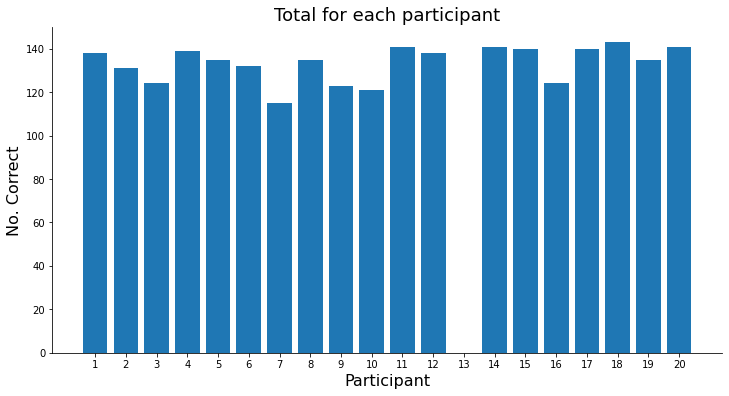

In [19]:
parts = list(participant_totals.keys())
totals = [results["aggs"]["data_total"] for results in participant_totals.values()]

fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(parts, totals)

plt.title(f"Total for each participant", fontsize=titlesize)
plt.xlabel("Participant", fontsize=axissize)
plt.ylabel("No. Correct", fontsize=axissize)

plt.xticks(ticks=[i for i in range(1, len(parts)+1)])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

print(totals)
totals = np.array(totals)
totals = totals[totals != 0]
mean = np.mean(totals)
print(totals)
print(f"Giving a total mean of {mean}")

## Analysis by Scheme

### Results of data trials for each Participant

Giving a total mean of 22.416666666666668 for Singular Constant
Giving a total mean of 23.0 for Singular Varying
Giving a total mean of 17.833333333333332 for Wall Constant
Giving a total mean of 23.5 for Wall Varying
Giving a total mean of 20.5 for Wave Constant
Giving a total mean of 23.75 for Wave Varying


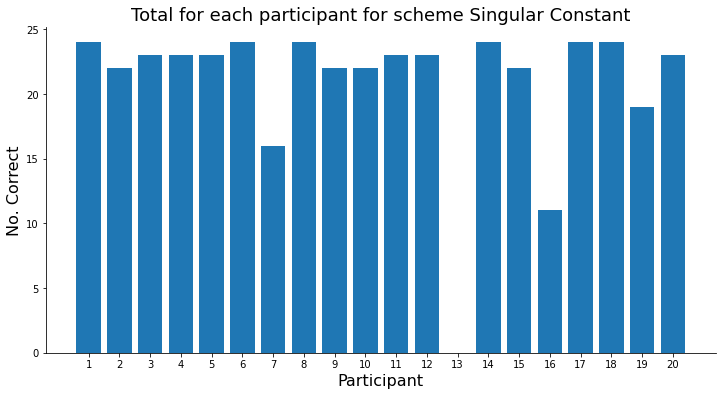

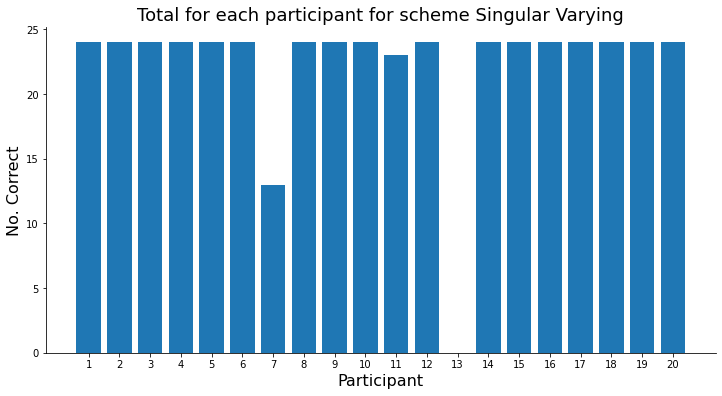

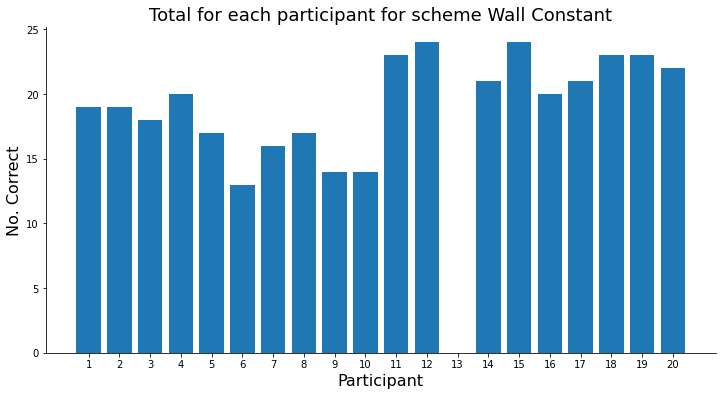

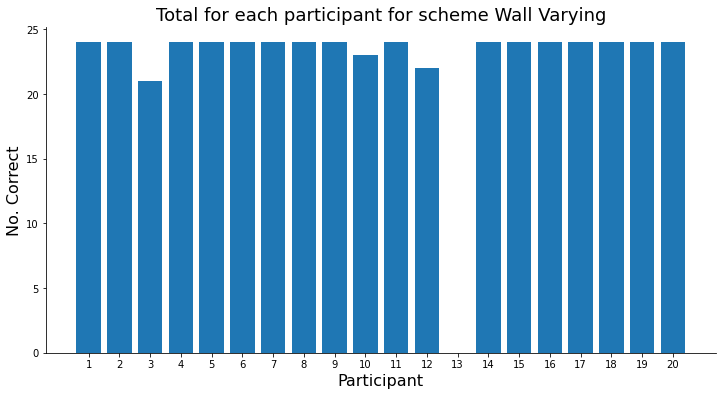

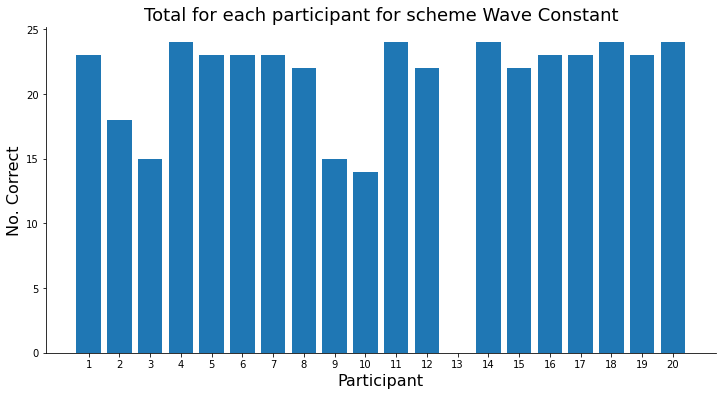

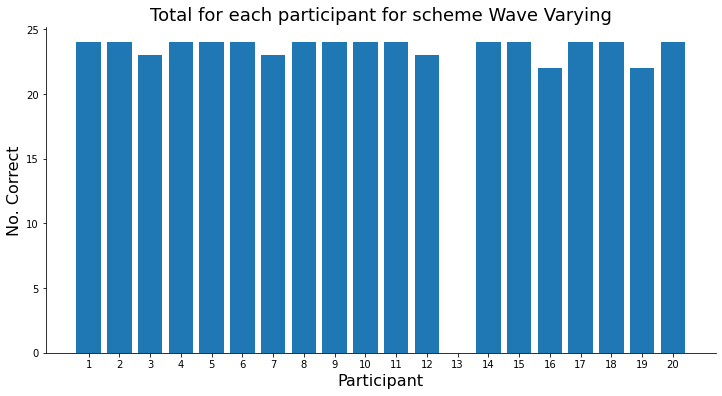

In [20]:
schemes = ['Singular Constant', 'Singular Varying', 'Wall Constant', 'Wall Varying', 'Wave Constant', 'Wave Varying']
scheme_totals = {}
for s in schemes:
    scheme_totals[s] = []

for p, results in participant_totals.items():
    scheme_order = results["schemes"]
    t = results["aggs"]["data_trial_totals"]
    totals = [t[i] + t[i+1] for i in range(0, len(t), 2)]
    #print(scheme_order)
    #print(totals)
    for s in schemes:
        i = scheme_order.index(s)
        #print(s, totals[i])
        scheme_totals[s] += [totals[i]]
    
#print(scheme_totals)
for s in schemes:
    mean = np.mean(scheme_totals[s][:12])
    print(f"Giving a total mean of {mean} for {s}")
    
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.bar(list(participant_totals.keys()), scheme_totals[s])
    plt.title(f"Total for each participant for scheme {s}", fontsize=titlesize)
    
    plt.xlabel("Participant", fontsize=axissize)
    plt.ylabel("No. Correct", fontsize=axissize)

    plt.xticks(ticks=[i for i in range(1, len(parts)+1)])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

### Data Totals for every scheme

[416, 444, 368, 450, 409, 449]


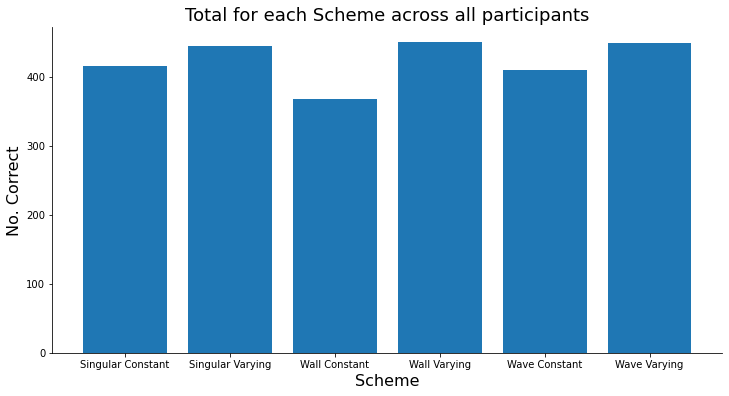

In [21]:
schemes = ['Singular Constant', 'Singular Varying', 'Wall Constant', 'Wall Varying', 'Wave Constant', 'Wave Varying']
totals = [sum(t) for t in scheme_totals.values()]
print(totals)

fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(schemes, totals)

plt.title(f"Total for each Scheme across all participants", fontsize=titlesize)
plt.xlabel("Scheme", fontsize=axissize)
plt.ylabel("No. Correct", fontsize=axissize)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## Mistake Analysis

Each data collection trial has 12 vibrations: 4 far, 4 near, and 4 imminent.
Therefore each distance category has 48 vibrations across data collecion for each participant.

In [22]:
distance_mistakes = {"FAR": [], "NEAR": [], "IMMINENT": []}
schemes = ['Singular Constant', 'Singular Varying', 'Wall Constant', 'Wall Varying', 'Wave Constant', 'Wave Varying']

# init mistake count
mistake_count = {}
for dis in distance_mistakes.keys():
    mistake_count[dis] = {}
    for s in schemes:
        mistake_count[dis][s] = 0
        
# init mistake_scheme count
mistakes_schemes = {}
for s in schemes:
    mistakes_schemes[s] = {}
    for dis in distance_mistakes.keys():
        mistakes_schemes[s][dis] = {}
        for d in list(distance_mistakes.keys()) + ["MISSED"]:
            mistakes_schemes[s][dis][d] = 0

    
# combine participant mistakes
for p, results in participant_totals.items():
    d = results["distance_mistakes"]
    for distance, mistakes in d.items():
        distance_mistakes[distance] += mistakes
        
        
# count mistakes       
for dis, mistakes in distance_mistakes.items():
    for m in mistakes:
        s = m[0]
        guess = m[1]
        mistake_count[dis][s] += 1
        mistakes_schemes[s][dis][guess] += 1
        

### Grouped by Distance Category

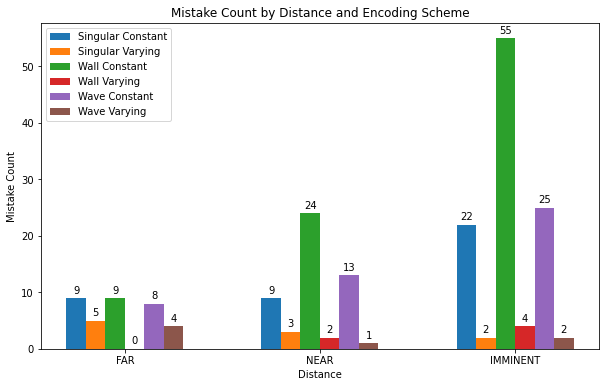

In [23]:
distances = list(mistake_count.keys())
schemes = list(mistake_count['FAR'].keys())
scheme_data = {scheme: [mistake_count[distance][scheme] for distance in distances] for scheme in schemes}

# Set positions and width for bars
index = np.arange(len(distances))
bar_width = 0.1
pos = index - (bar_width * (len(schemes) - 1) / 2)

fig, ax = plt.subplots(figsize=(10, 6))
for scheme in schemes:
    bars = ax.bar(pos, scheme_data[scheme], bar_width, label=scheme)
    pos += bar_width
    # Add a label on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


ax.set_xlabel('Distance')
ax.set_xticks(index)
ax.set_xticklabels(distances)
ax.set_ylabel('Mistake Count')

ax.set_title('Mistake Count by Distance and Encoding Scheme')
ax.legend()
plt.show()

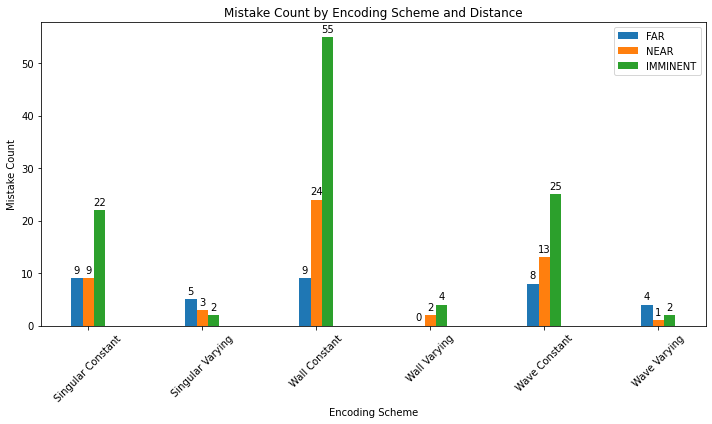

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

# Setting the positions and width for the bars
index = np.arange(len(schemes))
bar_width = 0.1
distance_positions = [index + i * bar_width for i in range(len(distances))]

# Create bars for each distance within each scheme group
for idx, distance in enumerate(distances):
    bars = ax.bar(distance_positions[idx], [mistake_count[distance][scheme] for scheme in schemes], 
                  bar_width, label=distance)
    # Add a label on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


ax.set_xlabel('Encoding Scheme')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(schemes, rotation=45)
ax.set_ylabel('Mistake Count')
ax.set_title('Mistake Count by Encoding Scheme and Distance')

ax.legend()
plt.tight_layout()
plt.show()


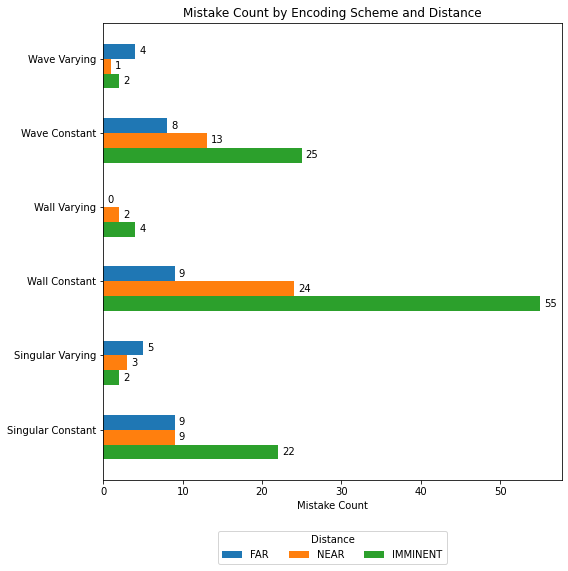

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
scheme_positions = np.arange(len(schemes))
bar_width = 0.2

# Offset position for each distance group
distance_offsets = np.arange(len(distances)) * bar_width

# Plot bars for each distance within each scheme
for idx, distance in enumerate(distances):
    mistake_counts = [mistake_count[distance][scheme] for scheme in schemes]
    bars = ax.barh(scheme_positions - distance_offsets[idx], mistake_counts, bar_width, label=distance)
    # Add value labels next to each bar
    for bar in bars:
        width = bar.get_width()
        label_x_pos = bar.get_x() + width if width >= 0 else bar.get_x()
        ax.text(label_x_pos+0.5, bar.get_y() + bar.get_height() / 2, f'{width}', va='center')


ax.set_yticks(scheme_positions - bar_width / 2)
ax.set_yticklabels(schemes)
ax.set_xlabel('Mistake Count')
ax.set_title('Mistake Count by Encoding Scheme and Distance')

ax.legend(title='Distance', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=len(distances))
plt.tight_layout()
plt.show()


{'FAR': Counter({'NEAR': 24, 'IMMINENT': 7}), 'NEAR': Counter({'IMMINENT': 36, 'FAR': 13}), 'IMMINENT': Counter({'NEAR': 89, 'FAR': 15})}


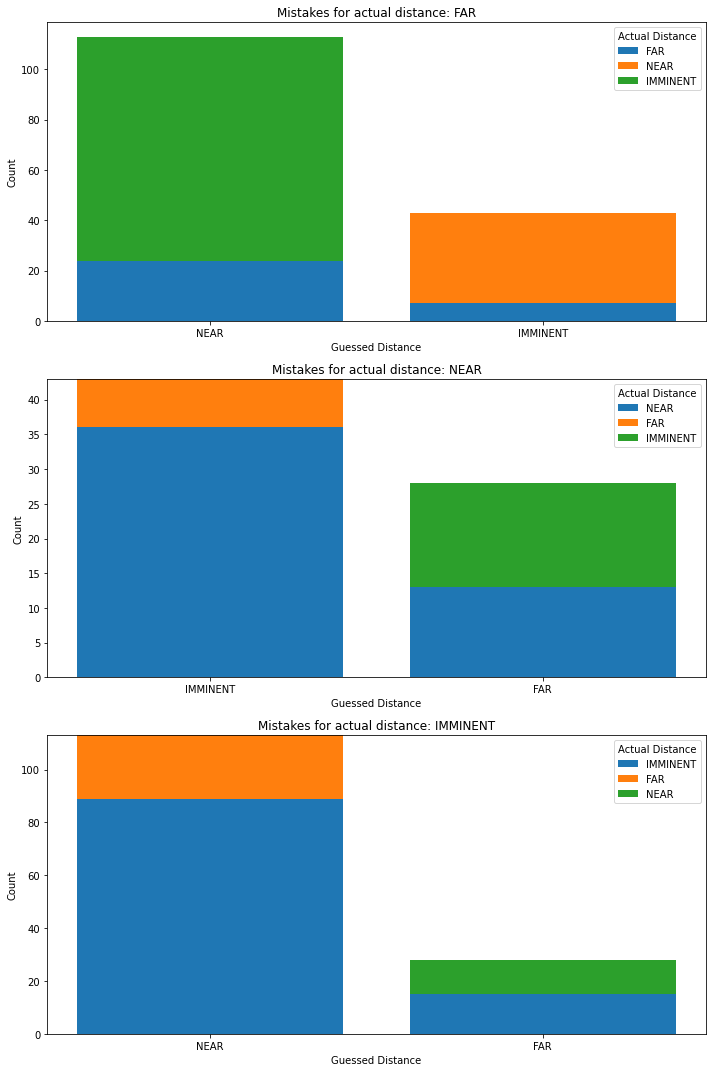

In [26]:
from collections import Counter

mistakes_summary = {dis: Counter() for dis in distance_mistakes.keys()}

for actual_distance, mistakes in distance_mistakes.items():
    for mistake in mistakes:
        scheme, guessed_distance = mistake
        if guessed_distance != 'MISSED':
            mistakes_summary[actual_distance][guessed_distance] += 1

print(mistakes_summary)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

for ax, (actual_distance, counts) in zip(axes, mistakes_summary.items()):
    categories = counts.keys()
    values = counts.values()

    # Plotting the initial bar
    ax.bar(categories, values, label=actual_distance)

    # For subsequent bars, we need to stack them on top of the previous ones
    # We will keep track of the "bottom" for each category to do this
    bottoms = np.array(list(values))

    for other_distance in mistakes_summary.keys():
        if other_distance != actual_distance:
            # Get the values for this distance and update the bottoms
            new_values = [mistakes_summary[other_distance].get(category, 0) for category in categories]
            ax.bar(categories, new_values, bottom=bottoms, label=other_distance)
            bottoms += np.array(new_values)

    ax.set_title(f'Mistakes for actual distance: {actual_distance}')
    ax.set_xlabel('Guessed Distance')
    ax.set_ylabel('Count')
    ax.legend(title='Actual Distance')

plt.tight_layout()
plt.show()

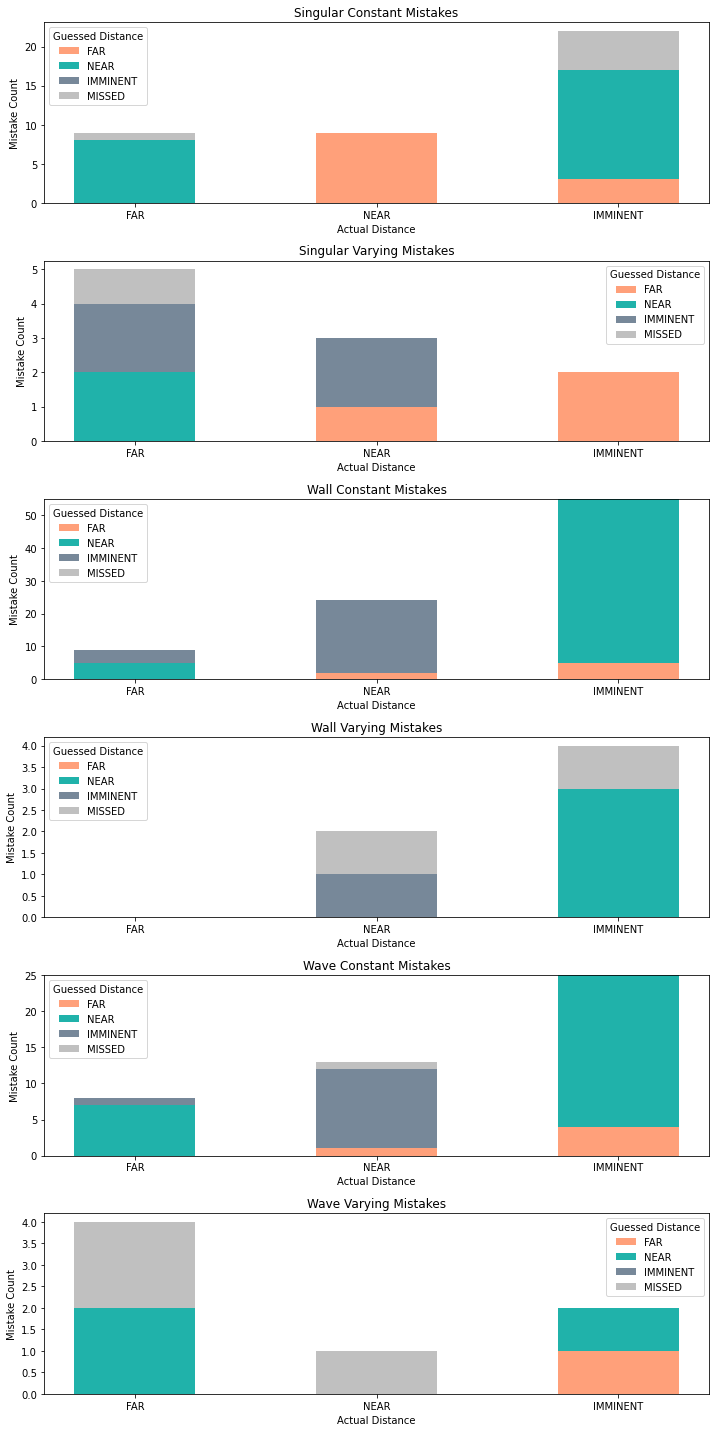

In [27]:
order_of_distances = ['FAR', 'NEAR', 'IMMINENT', 'MISSED']
colors = ['#FFA07A', '#20B2AA', '#778899', '#C0C0C0']  # light salmon, light sea green, light slate gray, silver

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 20), tight_layout=True)


for i, (scheme, distances_dict) in enumerate(mistakes_schemes.items()):
    bottoms = np.zeros(3)
    
    for idx, (guess, color) in enumerate(zip(order_of_distances, colors)):
        counts = [distances_dict[actual][guess] for actual in order_of_distances[:-1]]  # exclude 'MISSED' for x-axis labels
        axes[i].bar(order_of_distances[:-1], counts, bottom=bottoms, color=color, label=guess, width=0.5)
        bottoms += np.array(counts)
        
        axes[i].set_title(f'{scheme} Mistakes')
        axes[i].set_xlabel('Actual Distance')
        axes[i].set_ylabel('Mistake Count')
        axes[i].legend(title='Guessed Distance')
